<a href="https://colab.research.google.com/github/roy-rajarshi-27/Seoul-Bike-Sharing-Demand-Prediction-Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the libraries and the dataset**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

##**Mount the drive and import the datset**

In [ ]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load and read the seol bike data set from drive
df= pd.read_csv('/content/drive/MyDrive/Seoul Bike Dataset/SeoulBikeData.csv',encoding='latin')
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

**Features description**

Breakdown of Our Features:

* **Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

* **Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

* **Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

* **Temperature(°C)**: Temperature in Celsius, type : Float

* **Humidity(%)**: Humidity in the air in %, type : int

* **Wind speed (m/s)** : Speed of the wind in m/s, type : Float

* **Visibility (10m)**: Visibility in m, type : int

* **Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

* **Solar Radiation (MJ/m2)**: Sun contribution, type : Float

* **Rainfall(mm)**: Amount of raining in mm, type : Float

* **Snowfall (cm)**: Amount of snowing in cm, type : Float

* **Seasons**: Season of the year, type : str, there are only 4 season's in data .

* **Holiday**: If the day is holiday period or not, type: str

* **Functioning Day**: If the day is a Functioning Day or not, type : str

##**Understand the data**

In [ ]:
#the shape of dataset with rows and columns
print(df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# checking the null value counts
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe().astype(int).T

count  mean  std  min  25%   50%   75%   max
Rented Bike Count           8760   704  644    0  191   504  1065  3556
Hour                        8760    11    6    0    5    11    17    23
Temperature(°C)             8760    12   11  -17    3    13    22    39
Humidity(%)                 8760    58   20    0   42    57    74    98
Wind speed (m/s)            8760     1    1    0    0     1     2     7
Visibility (10m)            8760  1436  608   27  940  1698  2000  2000
Dew point temperature(°C)   8760     4   13  -30   -4     5    14    27
Solar Radiation (MJ/m2)     8760     0    0    0    0     0     0     3
Rainfall(mm)                8760     0    1    0    0     0     0    35
Snowfall (cm)               8760     0    0    0    0     0     0     8

* This Dataset contains 8760 lines and 14 columns.
* In a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of line in the dataset.means we have the data of whole year.

In [ ]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

###**Breaking date column**
* Spliting Date column which is in string format into year, month, day as a category data type.

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
#Observing the pattern of data
df.iloc[20:25,:]

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
20 2017-12-01                426    20         -0.3        79         1.5   
21 2017-12-01                405    21         -0.8        81         0.8   
22 2017-12-01                398    22         -0.9        83         1.5   
23 2017-12-01                323    23         -1.3        84         1.0   
24 2017-12-02                328     0         -1.8        87         1.1   

    Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
20        1913                   -3.5              0.0       0.0       0.0   
21        1687                   -3.6              0.0       0.0       0.0   
22        1380                   -3.4              0.0       0.0       0.0   
23        1265                   -3.6              0.0       0.0       0.0   
24         994                   -3.6              0.0       0.0       0.0   

   Seasons     Holiday Functioning_Day  year  month       day  
20  Winter  No Holiday             Yes  2017     12    Friday  
21  Winter  No Holiday             Yes  2017     12    Friday  
22  Winter  No Holiday             Yes  2017     12    Friday  
23  Winter  No Holiday             Yes  2017     12    Friday  
24  Winter  No Holiday             Yes  2017     12  Saturday

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
df=df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [ ]:
#counting the value
print(df['Functioning_Day'].value_counts())
print(df['weekdays_weekend'].value_counts())

Yes    8465
No      295
Name: Functioning_Day, dtype: int64
0    6264
1    2496
Name: weekdays_weekend, dtype: int64


* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column is basically contain **from 2017 december to 2018 november i.e. one year** **we don't need the "year" column so we drop it**.
* The other column "day", it contains the each day of the month,we don't need each day of each month data but we need the data about, **if a day is a weekday or a weekend** so we convert it into this format and **drop the "day" column**.

#**Exploratory data analysis**

### **Univariate Analysis**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***
* ***Our dependent variable is "Rented Bike Count" so we need to analyse this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

####**Analysis of Categorical data by visualization**
* ***Month***      
* ***weekdays_weekend***
* ***Hour***
* ***Functioning Day***
* ***Season***
* ***Holiday***

In [ ]:
#categorical_features
categorical_column = ['Hour', 'month', 'weekdays_weekend','Seasons','Holiday','Functioning_Day']

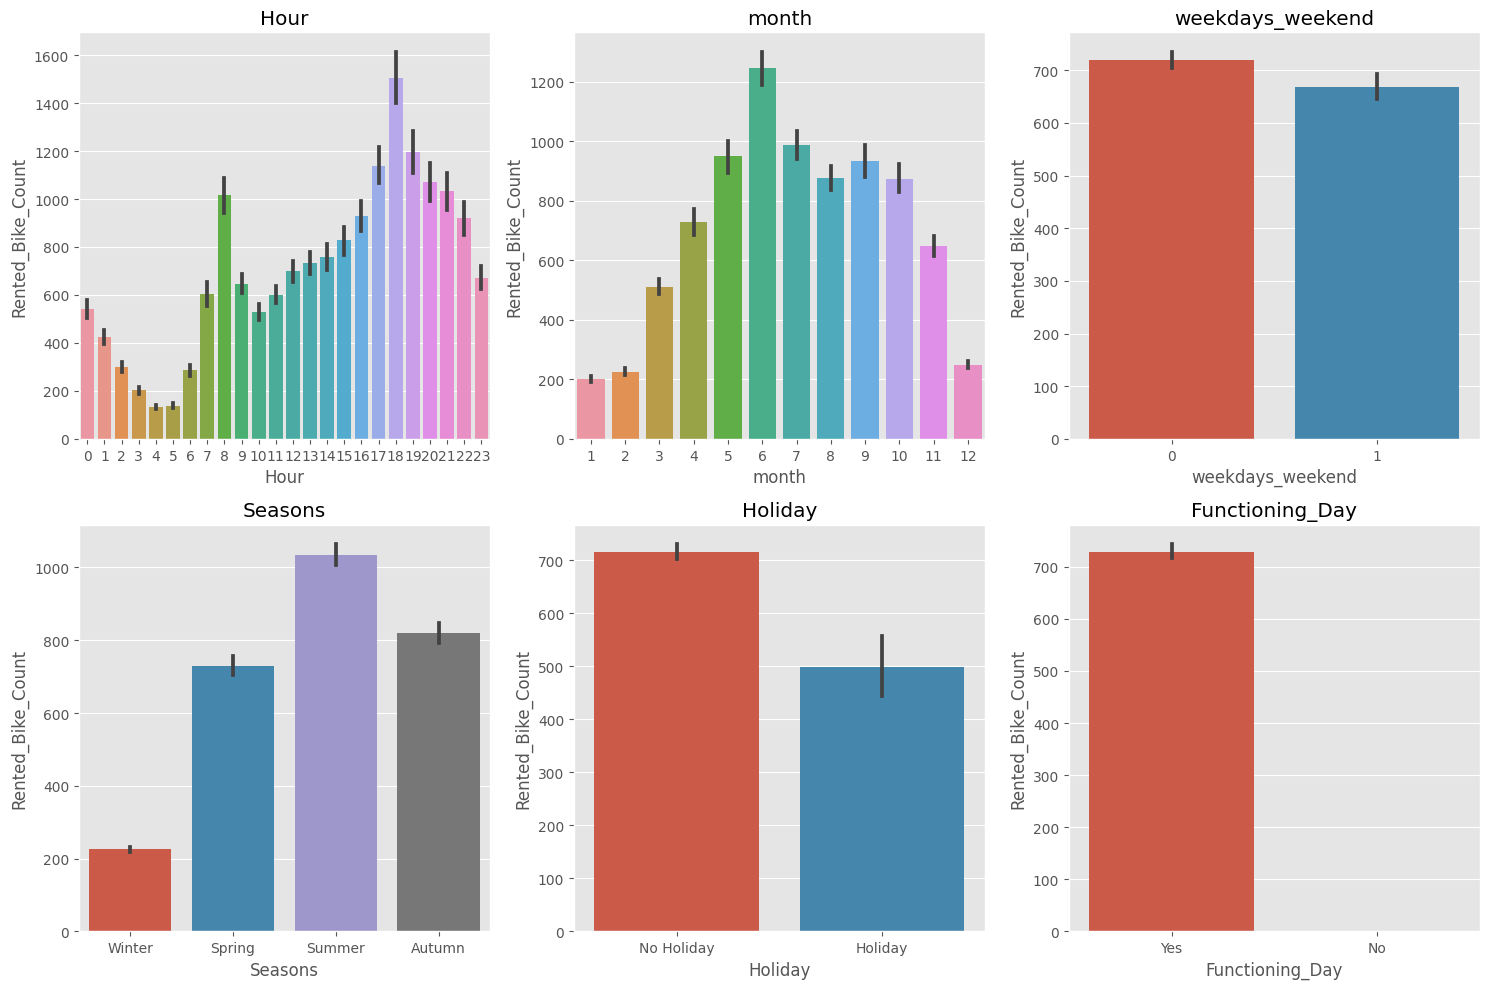

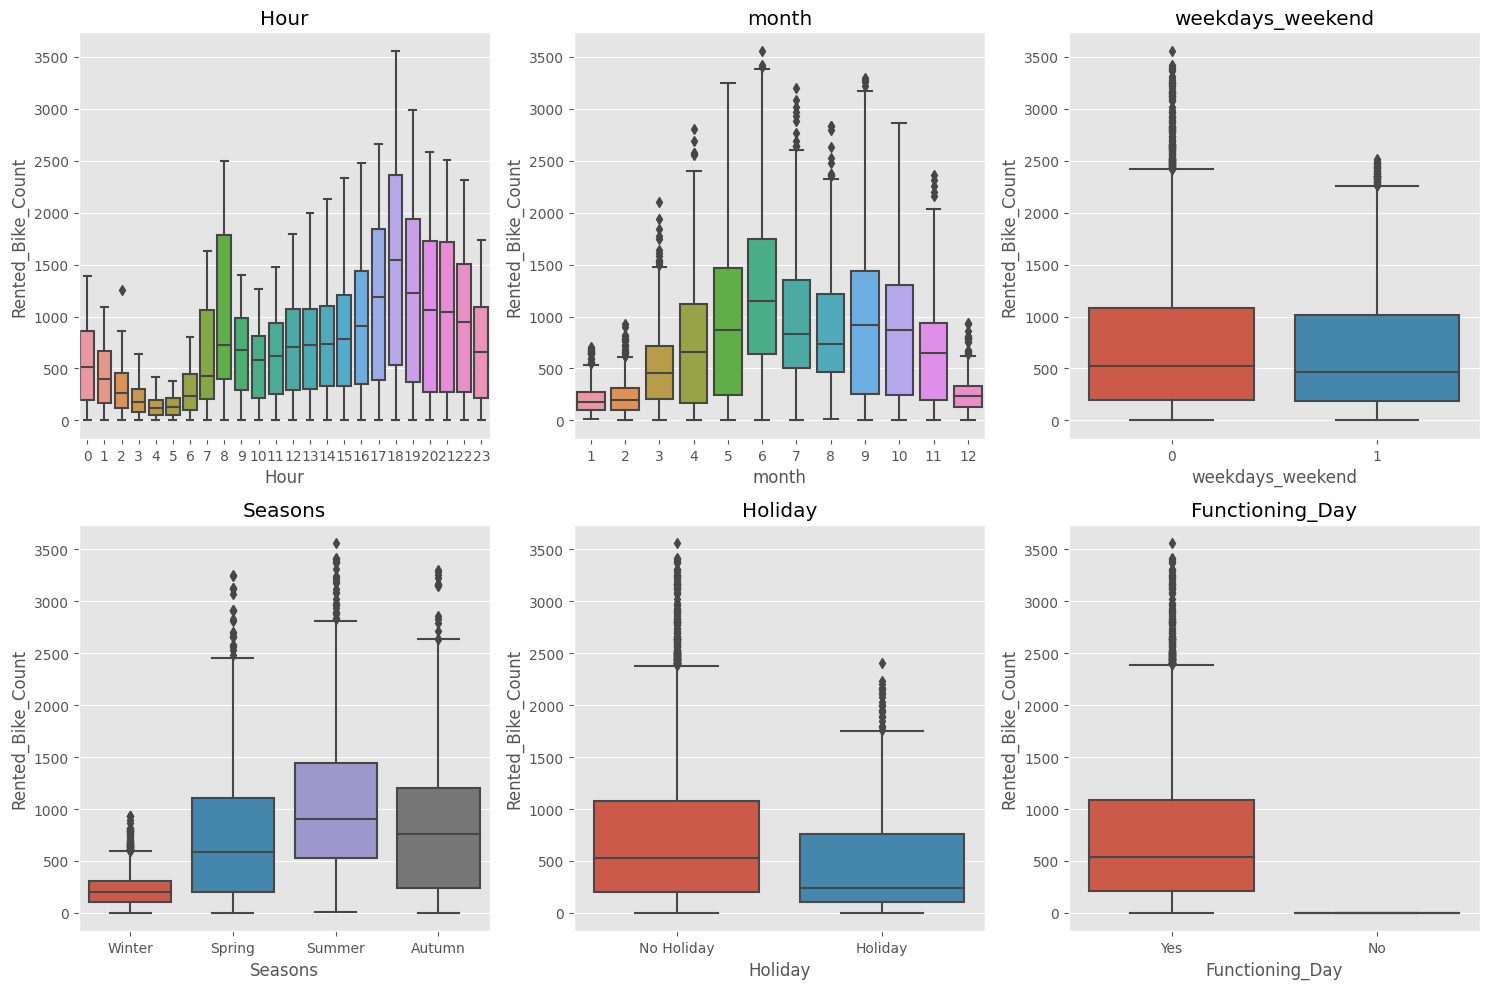

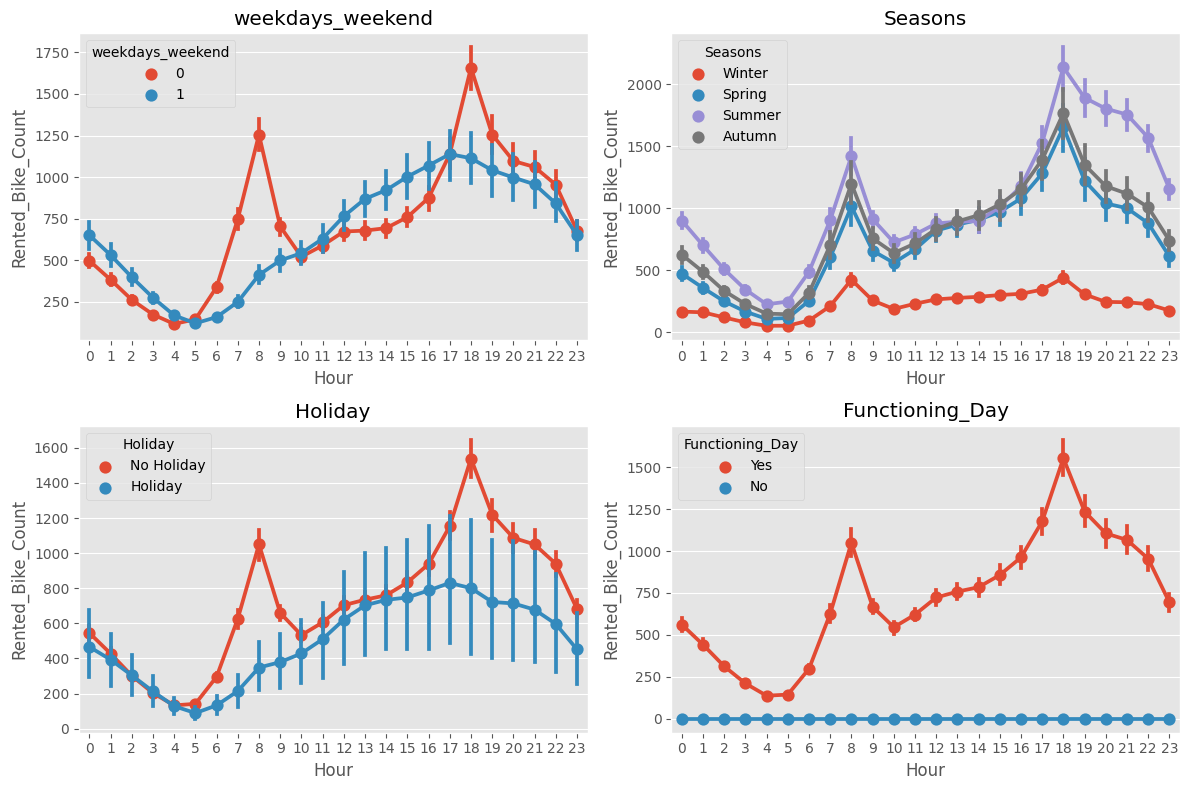

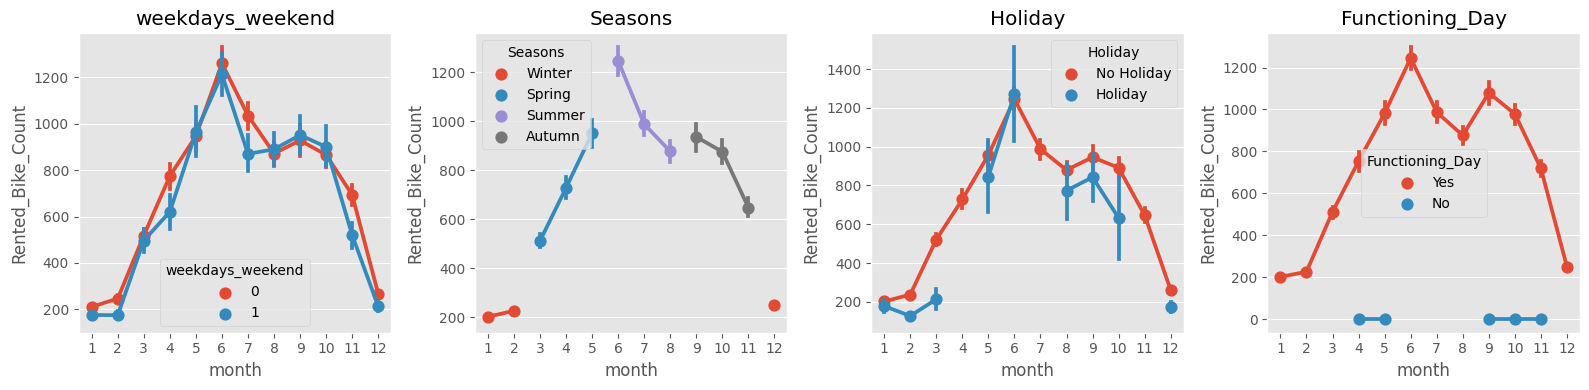

In [ ]:
#Visualization by barchart and boxplot of categorical variables
plt.figure(figsize=(15,10))
for n,col in enumerate(categorical_column):
  plt.subplot(2,3,n+1)
  plt.title(col)
  sns.barplot(data=df,x=col,y='Rented_Bike_Count')
  plt.tight_layout();

#getting boxplot for categorical features vs rented bike count
plt.figure(figsize=(15,10))
for n,col in enumerate(categorical_column):
  plt.subplot(2,3,n+1)
  plt.title(col)
  sns.boxplot(data=df,x=col,y='Rented_Bike_Count');
  plt.tight_layout();

#getting countplot for hour
plt.figure(figsize=(12,8))
for n,col in enumerate(['weekdays_weekend','Seasons','Holiday','Functioning_Day']):
  plt.subplot(2,2,n+1)
  plt.title(col)
  sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue=col)
  plt.tight_layout();

#getting countplot for month
plt.figure(figsize=(16,4))
for n,col in enumerate(['weekdays_weekend','Seasons','Holiday','Functioning_Day']):
  plt.subplot(1,4,n+1)
  plt.title(col)
  sns.pointplot(data=df,x='month',y='Rented_Bike_Count',hue=col)
  plt.tight_layout();

###**Discussion**
* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 9pm.***   

* ***the demand of the rented bike is high in May, June, July, August, September as compare to other months.these months are comes inside the summer season.***

* ***in the week days(Peak Time: 7 am to 9 am, 5 pm to 9 pm) the demand of the bike higher because of the office.***

* **on weekend days, the demand of rented bikes are very low specially in the morning hour but from 4 pm to 8 pm the demand slightly increases.**

* ***Peoples use rented bikes mostly on functioning day.***

* ***highest rented bike : in summer season(peak time: 7am-9am and 5pm-9pm), lowest rented bike : in winter season, highest rented bike on holidays : in May-June month, lowest rented bike on holidays : in December-January-February month***

* ***the use of rented bike is highest when there is no holiday(peak time: 2pm-8pm)***

####**Analysis of Numerical data by visualization**
* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

In [ ]:
#making list of continuous variables
numerical_features = ['Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']

###Numerical vs rented_bike_count

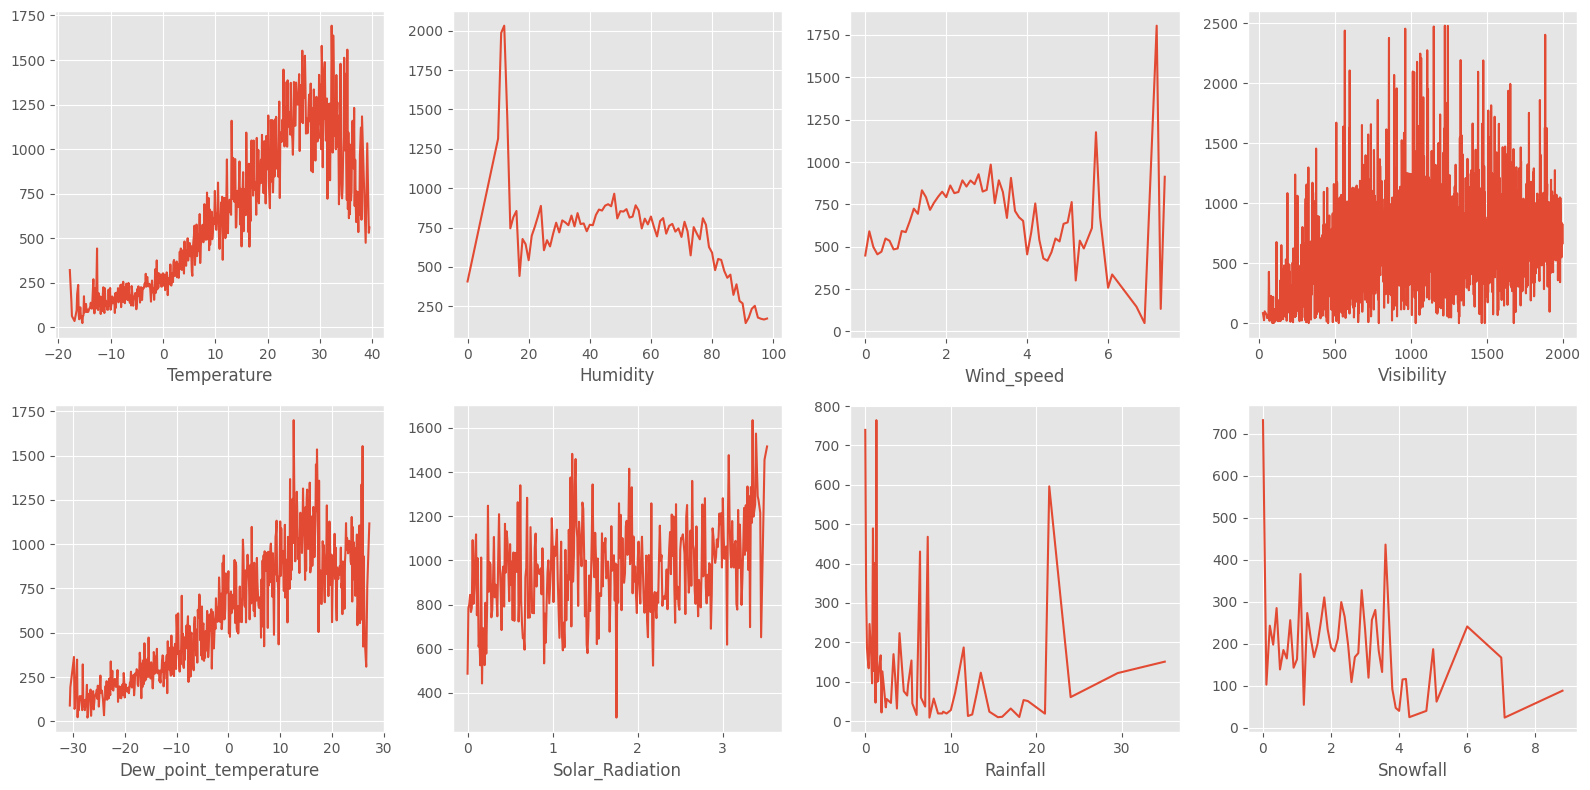

In [ ]:
# making function to print all numerical features
plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
  plt.subplot(2,4,n+1)
  df.groupby(col).mean()['Rented_Bike_Count'].plot();
  plt.tight_layout()

* From the above plot we see that people like to ride bikes when it is pretty hot around 25°C average.
* We can see from the above plot that the **demand of rented bike is uniformly distributed** **despite of wind speed** but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means **peoples love to ride bikes when its little windy**.
* from the above plot we see that, the **amount of rented bikes is huge, when there is solar radiation**. when there is increase in solar radiation, there is increase in rented bike.
* we can see from above plot, **when there is no rain, rented bike count is huge**, but when there is rain, we can see increase in bike rented only at certain points, maybe it is when people are going to home from office on weekdays. but otherwise,there is no huge spike in the rented bike.
* We can see from the plot that, on the y-axis, **the amount of rented bike is very low When we have more than 4 cm of snow**, the bike rents is much lower

###**Regression plot**
**The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

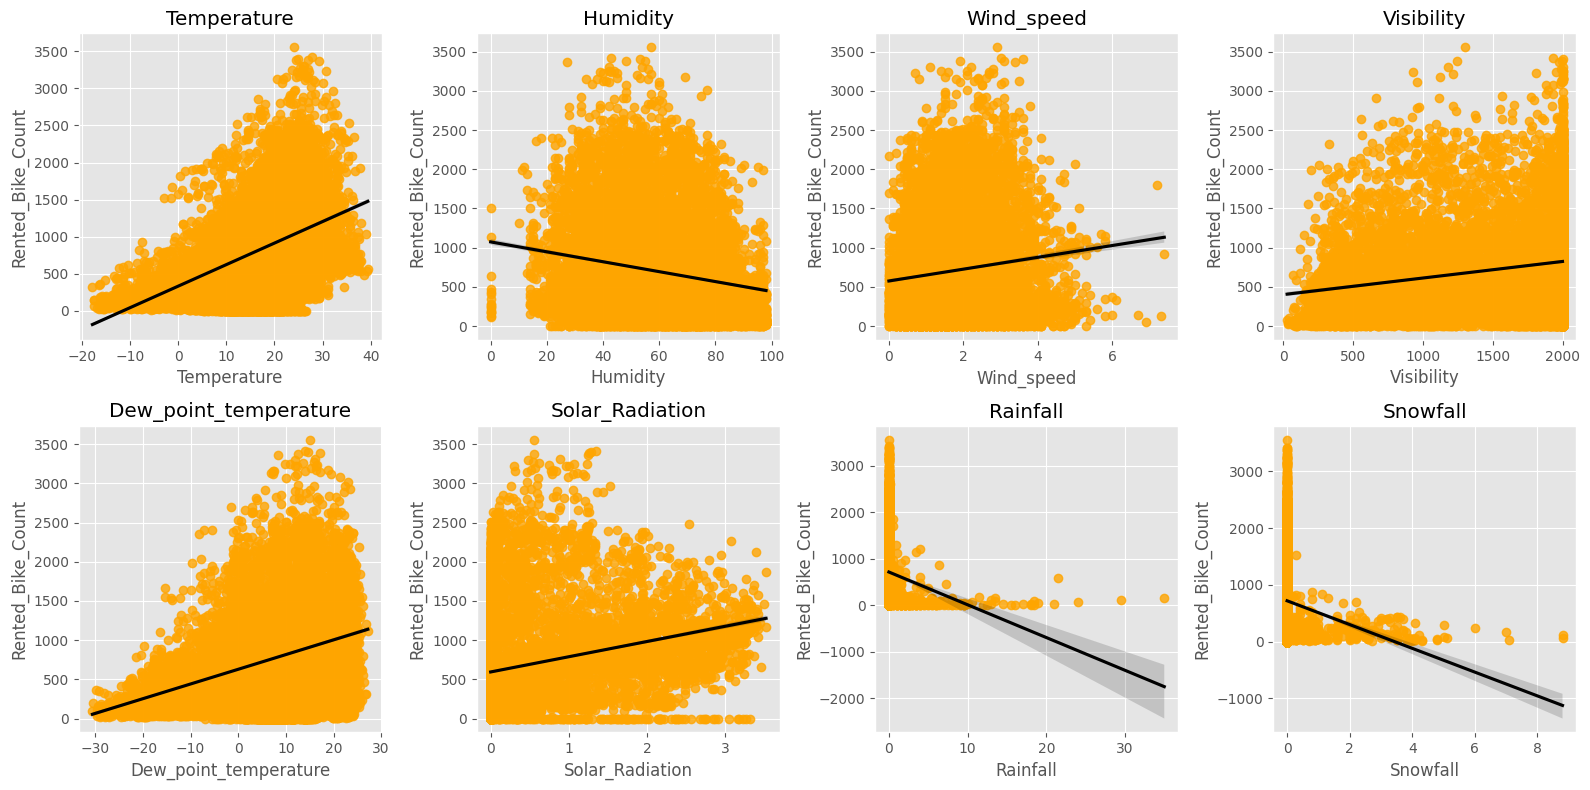

In [ ]:
#printing the regression plot for all the numerical features
plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
  plt.subplot(2,4,n+1)
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});
  plt.title(col)
  plt.tight_layout()

* From the above regression plot of all numerical features we see that the columns  **Temperature, Wind_speed, Solar_Radiation Snowfall are positively relation to the target variable**.which means the rented bike count increases with increase of these features.
* **Rainfall, Snowfall, Humidity these features are negatively related with the target variable** which means the rented bike count decreases when these features increase.

###**Checking skewness and outliers of the continuous Variable**

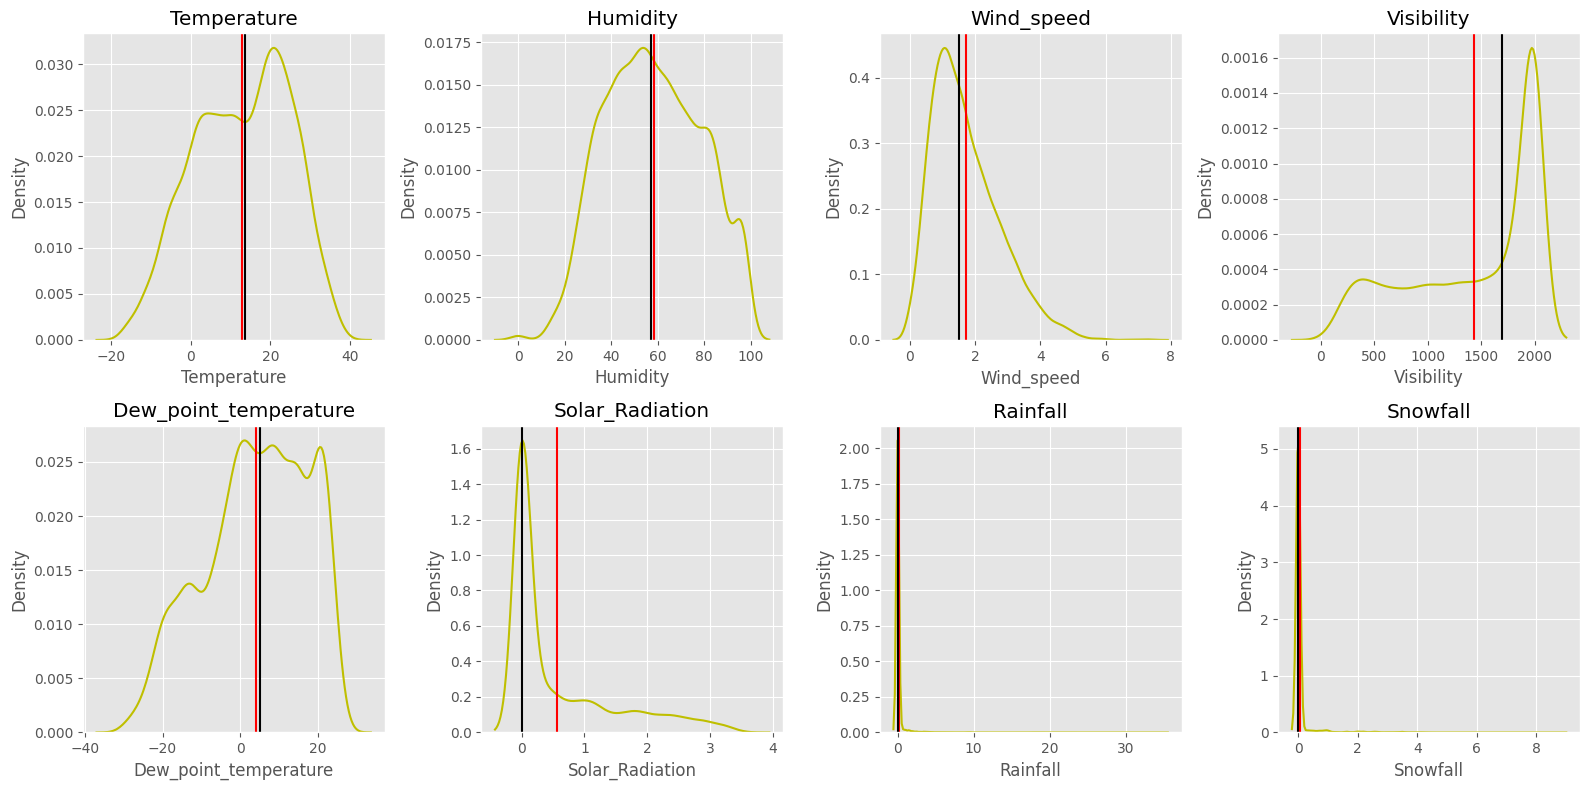

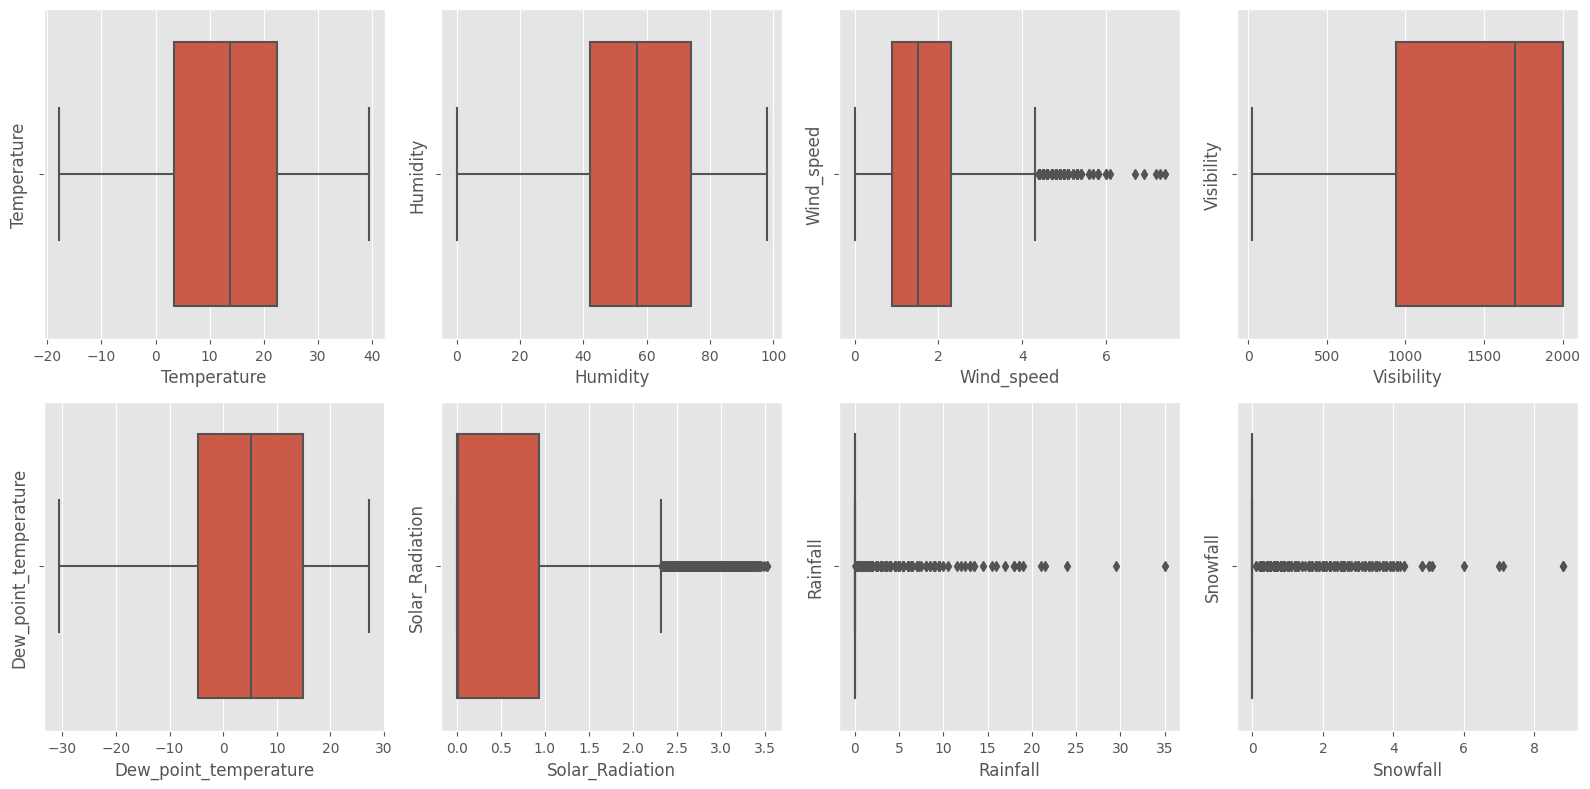

In [ ]:
#checking distribution and boxplot of continuous features
plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
  plt.subplot(2,4,n+1)
  plt.xlabel(col)
  plt.ylabel('Density')
  ax=sns.distplot(df[col],hist=False ,color="y")
  ax.axvline((df[col]).mean(),color='red')
  ax.axvline((df[col]).median(),color='black')
  plt.title(col)
  plt.tight_layout();

plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
    plt.subplot(2,4,n+1)
    plt.ylabel(col)
    sns.boxplot(x=(df[col]))
    plt.tight_layout()

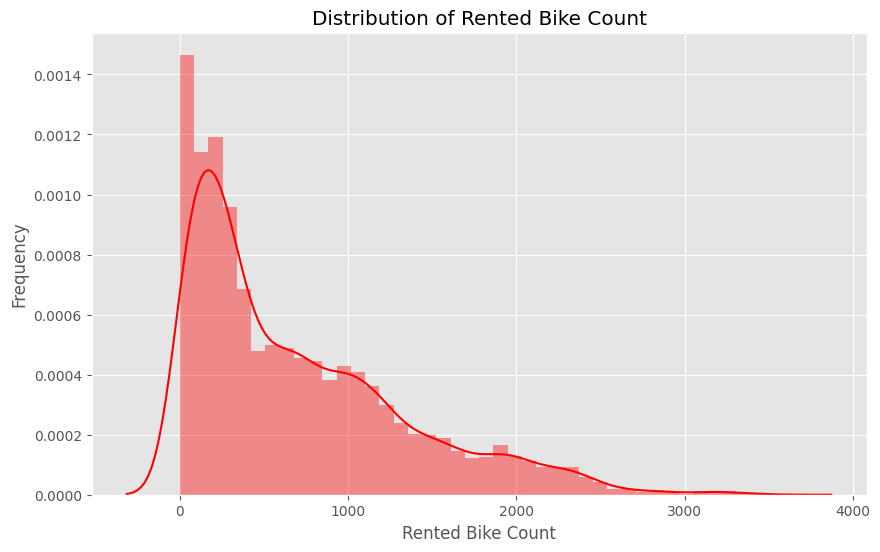

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Rented_Bike_Count'], kde=True, color='red')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

* The above graph shows that Rented_Bike_Count,Visibility,Solar_Radiation,Rainfall,Snowfall has **highly skewed**. Since the assumption of linear regression is that 'the **distribution of dependent and independent variable has to be normal**', so we should perform some operation to make it normal.
* From boxplot, we have detected outliers in Rented Bike Count, Snowfall,Rainfall, Solar radiation, Wind speed column.

### **Methods to treat outliers:**
* **Trimming/Remove the outliers:** In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.
* **Quantile based flooring and capping:** In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
* **Mean/Median imputation:** As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

###**Method to treat Skewness:**
* **1.log transformation:** transform skewed distribution to a normal distribution.
* **2.Remove outliers**
* **3.Normalize (min-max)**
* **4.Cube root:** when values are too large. Can be applied on negative values.
* **5.Square root:** applied only to positive values.
* **6.Reciprocal**
* **7.Square: apply on left skew**
* **Skewness in target variable:** Use undersampling, oversampling or SMOTE

In [ ]:
df['Snowfall'].quantile([0.01, 0.5, 0.99])

0.01    0.0
0.50    0.0
0.99    2.5
Name: Snowfall, dtype: float64

In [ ]:
#Handling Skewness in the data
df['Rented_Bike_Count']=np.sqrt(df['Rented_Bike_Count'])
df['Snowfall']=np.cbrt(df['Snowfall'])
df['Rainfall']=np.cbrt(df['Rainfall'])
df['Solar_Radiation']=np.sqrt(df['Solar_Radiation'])

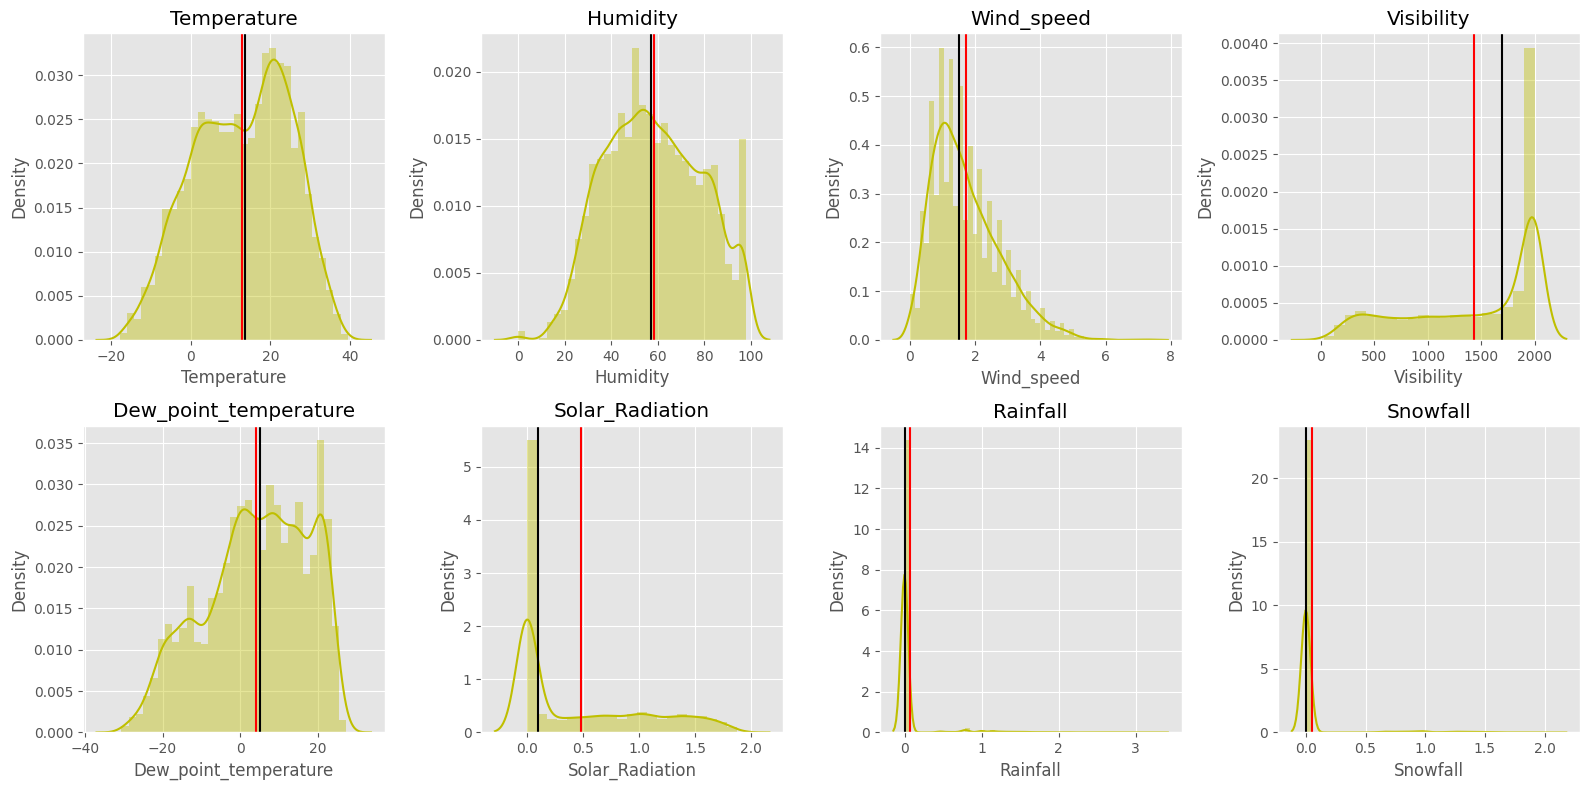

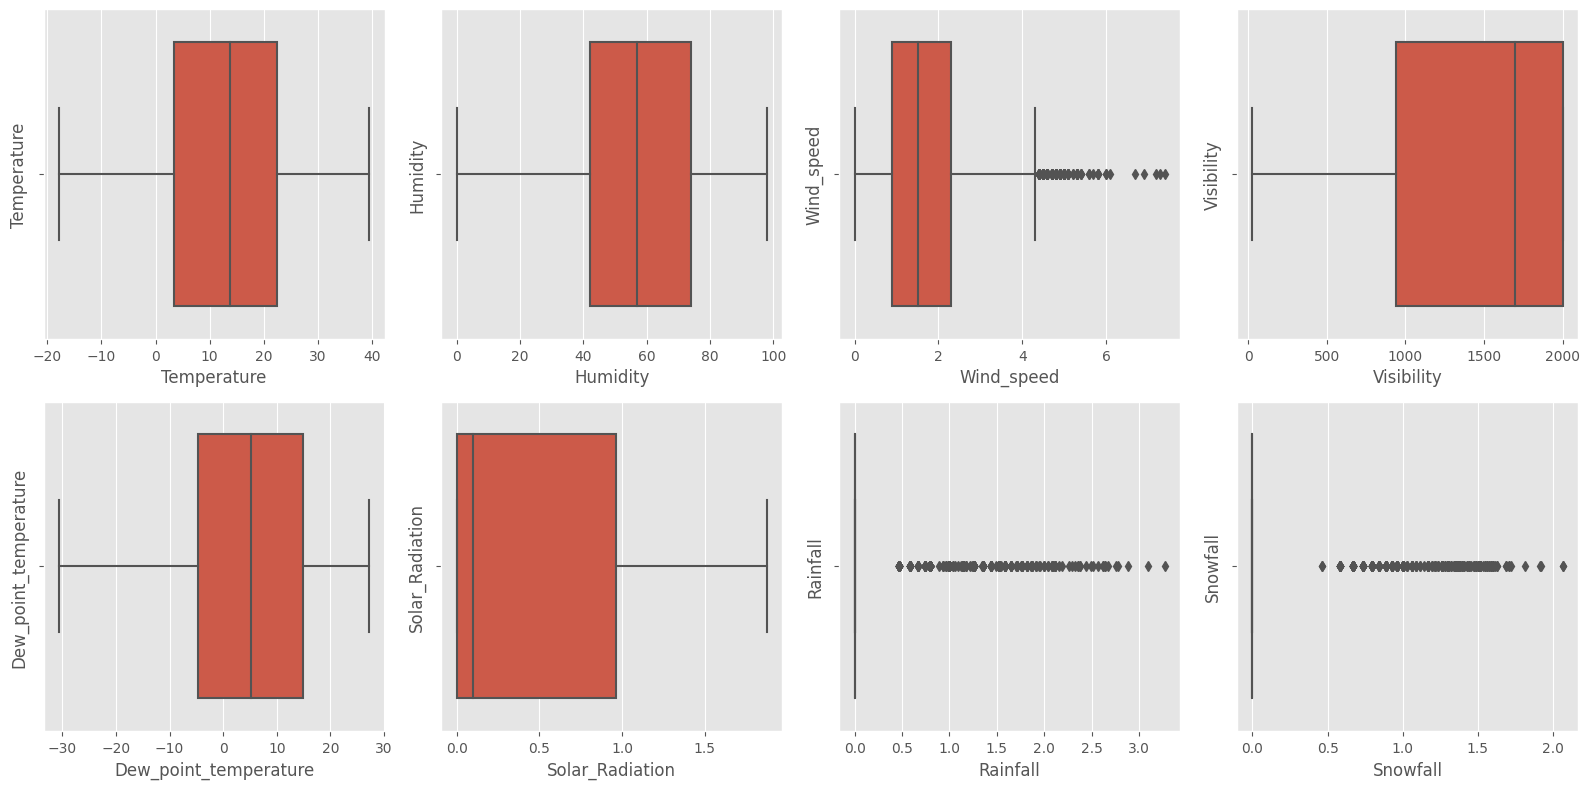

In [ ]:
#checking distribution and boxplot of continuous features after applying some algorithm
plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
  plt.subplot(2,4,n+1)
  plt.xlabel(col)
  plt.ylabel('Density')
  ax=sns.distplot(df[col],hist=True ,color="y")
  ax.axvline((df[col]).mean(),color='red')
  ax.axvline((df[col]).median(),color='black')
  plt.title(col)
  plt.tight_layout();

plt.figure(figsize=(16,8))
for n,col in enumerate(numerical_features):
    plt.subplot(2,4,n+1)
    plt.ylabel(col)
    sns.boxplot(x=(df[col]))
    plt.tight_layout()

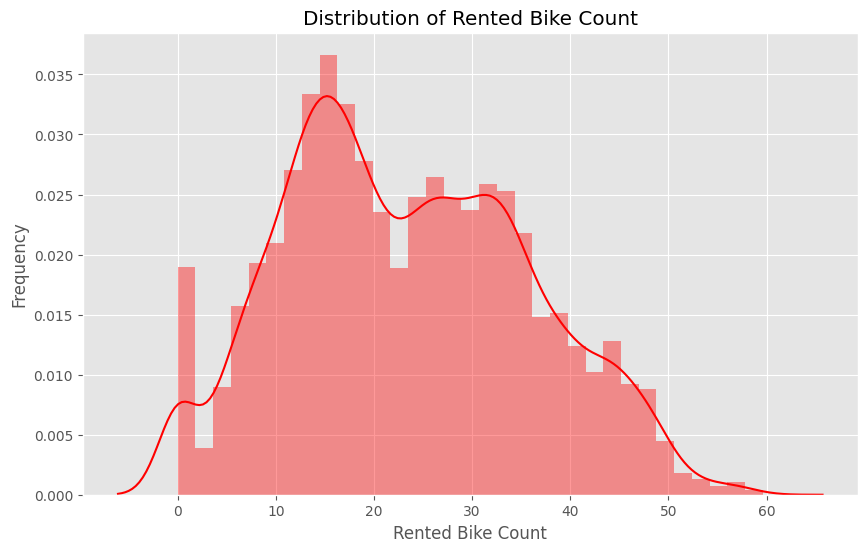

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Rented_Bike_Count'], kde=True, color='red')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

#**Feature selection**

###**Correlation Map**

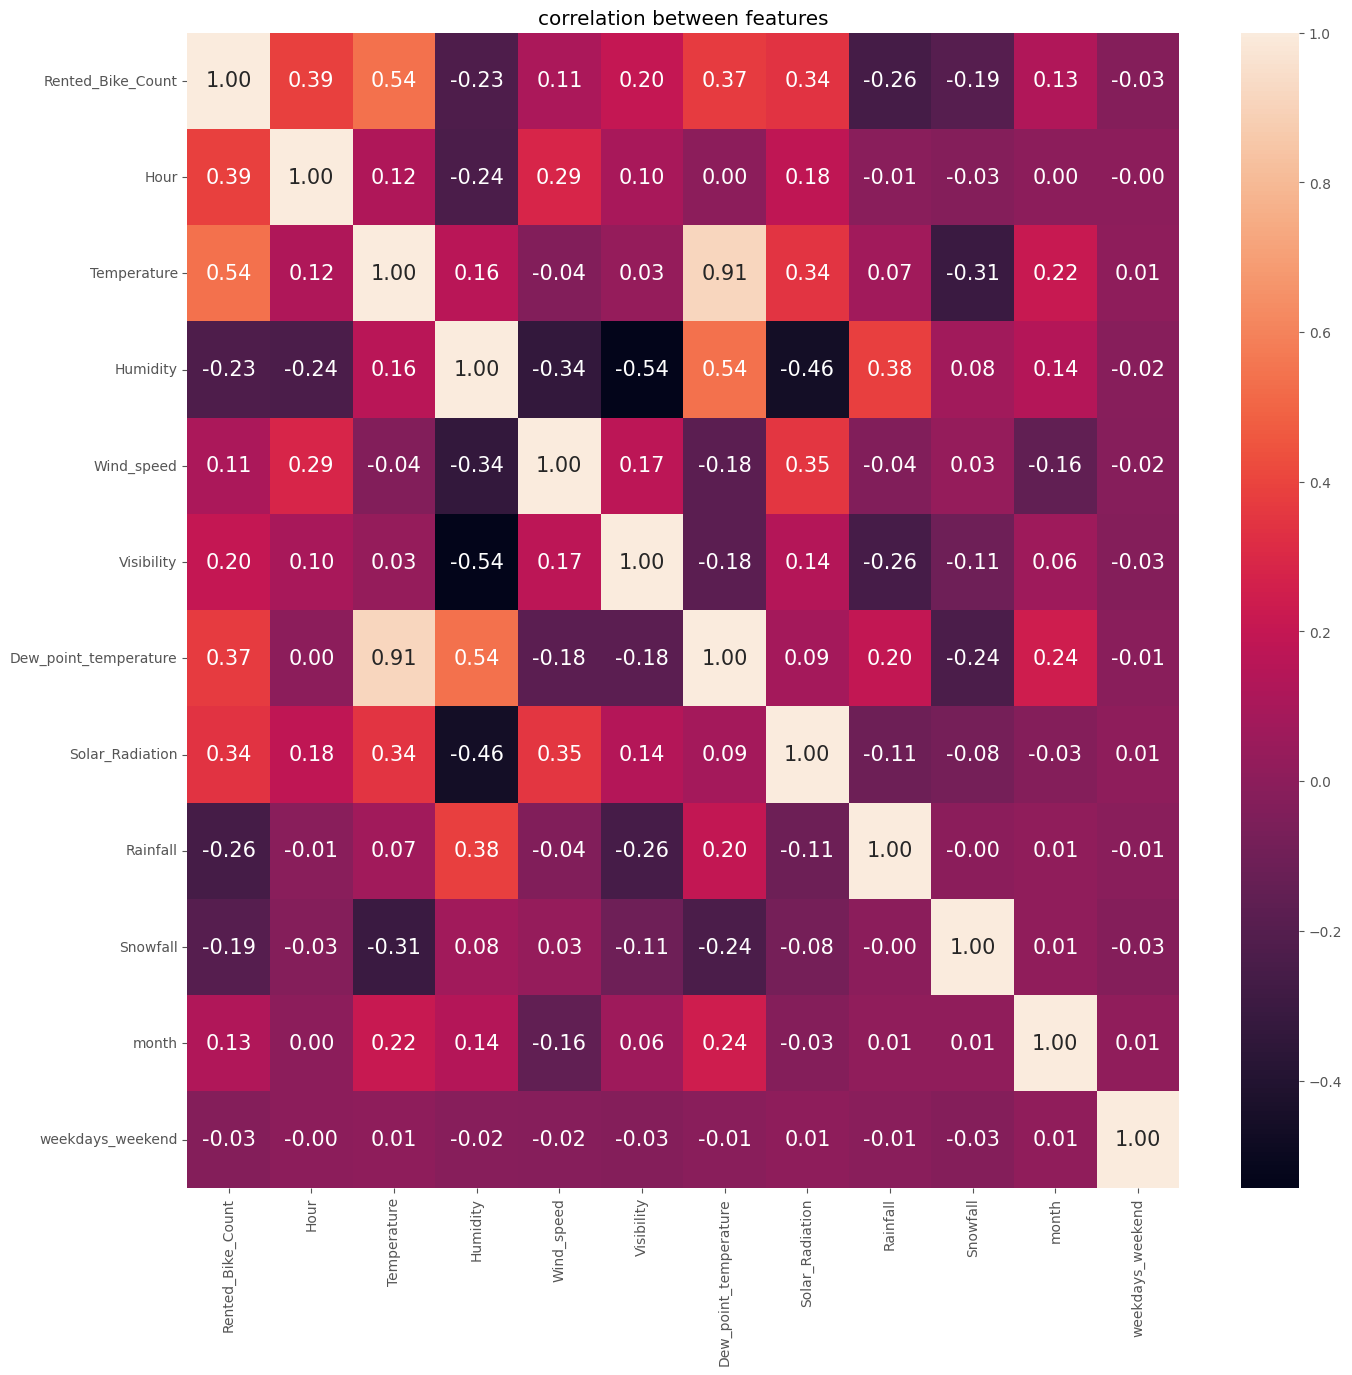

In [ ]:
# correlation map
plt.figure(figsize=(16,15))
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={'size':15})
plt.title('correlation between features');

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the bike rent are :***

* the temperature
* the dew point temperature
* the solar radiation
* Hour

***And most negatively correlated variables are:***
* Humidity
* Rainfall
* weekdays or weekends




* from above correlation map, we can see that, there is **high correlation between 'Dew Point Temperature' and Temperature**. here we are featuring the best suitable model,sp we have to drop either one of the feature i.e. either Temperature or Dew Point Temperature.

###**Checking Multicollinearity using VIF**

In [ ]:
#Defining Variance Inflaition Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [ ]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables        VIF
0                    Hour   4.370612
1             Temperature  35.036257
2                Humidity   7.353269
3              Wind_speed   4.945157
4              Visibility   9.426580
5   Dew_point_temperature  17.925460
6         Solar_Radiation   3.351280
7                Rainfall   1.241378
8                Snowfall   1.211409
9                   month   5.085051
10       weekdays_weekend   1.411033

**1. Variance Inflation Factor(VIF)**

– If VIF=1; No multicollinearity

– If VIF=<5; Low multicollinearity or moderately correlated

– If VIF=>5; High multicollinearity or highly correlated

In [ ]:
# dropping dew point temperature column which has high VIF
df = df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables       VIF
0              Hour  3.973181
1       Temperature  3.390818
2          Humidity  6.504554
3        Wind_speed  4.732078
4        Visibility  5.479972
5   Solar_Radiation  2.622147
6          Rainfall  1.233200
7          Snowfall  1.210612
8             month  5.011778
9  weekdays_weekend  1.381640

In [ ]:
# dropping dew point temperature column which has high VIF
df = df.drop(['Humidity'],axis=1)

In [ ]:
#removing visibility and dewpoint temperature from numerical feature column
numerical_features.remove('Dew_point_temperature')
numerical_features.remove('Humidity')

In [ ]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables       VIF
0              Hour  3.932890
1       Temperature  2.924426
2        Wind_speed  4.426022
3        Visibility  5.351752
4   Solar_Radiation  2.297917
5          Rainfall  1.114284
6          Snowfall  1.156278
7             month  4.080090
8  weekdays_weekend  1.353845

* Since VIF of all variables is <5, we can go with remaining variables.

In [ ]:
# description of numerical values
df.describe().astype(float).T

count         mean         std   min         25%  \
Rented_Bike_Count  8760.0    23.443395   12.450984   0.0   13.820275   
Hour               8760.0    11.500000    6.922582   0.0    5.750000   
Temperature        8760.0    12.882922   11.944825 -17.8    3.500000   
Wind_speed         8760.0     1.724909    1.036300   0.0    0.900000   
Visibility         8760.0  1436.825799  608.298712  27.0  940.000000   
Solar_Radiation    8760.0     0.478866    0.582955   0.0    0.000000   
Rainfall           8760.0     0.068315    0.296791   0.0    0.000000   
Snowfall           8760.0     0.053414    0.241317   0.0    0.000000   
month              8760.0     6.526027    3.448048   1.0    4.000000   
weekdays_weekend   8760.0     0.284932    0.451408   0.0    0.000000   

                           50%          75%          max  
Rented_Bike_Count    22.461075    32.638167    59.632206  
Hour                 11.500000    17.250000    23.000000  
Temperature          13.700000    22.500000    39.400000  
Wind_speed            1.500000     2.300000     7.400000  
Visibility         1698.000000  2000.000000  2000.000000  
Solar_Radiation       0.100000     0.964365     1.876166  
Rainfall              0.000000     0.000000     3.271066  
Snowfall              0.000000     0.000000     2.064560  
month                 7.000000    10.000000    12.000000  
weekdays_weekend      0.000000     1.000000     1.000000

In [ ]:
# description of object values
df.describe(include='O').T

count unique         top  freq
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning_Day  8760      2         Yes  8465

* here we can see that, **highest rented bike** is during **Spring season**.
* here we can see that, **highest rented bike** is when there is **no Holiday and Functioning Day**.

#**Data preprocessing**

###**Create Dummy Variables**
A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
categorical_features = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend']
categorical_features

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend']

###**one hot encoding**

In [ ]:
#one hot encoding using simple method
df1 = pd.get_dummies(df,columns=['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend'],drop_first=True)

In [ ]:
df1.head()

Rented_Bike_Count  Temperature  Wind_speed  Visibility  Solar_Radiation  \
0          15.937377         -5.2         2.2        2000              0.0   
1          14.282857         -5.5         0.8        2000              0.0   
2          13.152946         -6.0         1.0        2000              0.0   
3          10.344080         -6.2         0.9        2000              0.0   
4           8.831761         -6.0         2.3        2000              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  \
0       0.0       0.0       0       0       0  ...        0        0        0   
1       0.0       0.0       1       0       0  ...        0        0        0   
2       0.0       0.0       0       1       0  ...        0        0        0   
3       0.0       0.0       0       0       1  ...        0        0        0   
4       0.0       0.0       0       0       0  ...        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0        0         0         0         1                   0  
1        0        0        0         0         0         1                   0  
2        0        0        0         0         0         1                   0  
3        0        0        0         0         0         1                   0  
4        0        0        0         0         0         1                   0  

[5 rows x 47 columns]

#**ML model implementation**

###**Train Test Split for regression**
Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
x = df1.drop(['Rented_Bike_Count'],axis=1)
y = df1['Rented_Bike_Count']
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented_Bike_Count, Length: 8760, dtype: float64

In [ ]:
#Name of Features
x_columns = x.columns
x_columns

Index(['Temperature', 'Wind_speed', 'Visibility', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [ ]:
x.head()

Temperature  Wind_speed  Visibility  Solar_Radiation  Rainfall  Snowfall  \
0         -5.2         2.2        2000              0.0       0.0       0.0   
1         -5.5         0.8        2000              0.0       0.0       0.0   
2         -6.0         1.0        2000              0.0       0.0       0.0   
3         -6.2         0.9        2000              0.0       0.0       0.0   
4         -6.0         2.3        2000              0.0       0.0       0.0   

   Hour_1  Hour_2  Hour_3  Hour_4  ...  month_4  month_5  month_6  month_7  \
0       0       0       0       0  ...        0        0        0        0   
1       1       0       0       0  ...        0        0        0        0   
2       0       1       0       0  ...        0        0        0        0   
3       0       0       1       0  ...        0        0        0        0   
4       0       0       0       1  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 46 columns]

##**Standardising the features**

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7008, 46)
(7008,)
(1752, 46)


In [ ]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Transformed data
x_train = pd.DataFrame(x_train,columns=x_columns)
x_test = pd.DataFrame(x_test,columns=x_columns)

###**Function for Graphical representation**

In [ ]:
def metric_value(model,x_train,y_train,x_test,y_test):
    #get the y predicted value for train and test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #Calculating metric value for testing dataset
    #Calculate MSE
    MSE = mean_squared_error(y_train, y_pred_train)
    #calculate RMSE
    RMSE = np.sqrt(MSE)
    #calculate MAE
    MAE = mean_absolute_error(y_train, y_pred_train)
    #calculate r2 and adjusted r2
    r2 = r2_score(y_train, y_pred_train)
    Adjusted_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
    #creating table of metric values
    data_set = [['MAE',round((MAE),3)],['MSE',round((MSE),3)],
                ['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    training_df = pd.DataFrame(data_set, columns=['metrics','train_values'])

    #Calculating metric value for testing dataset
    #calculate MSE
    MSE = mean_squared_error(y_test, y_pred_test)
    #calculate RMSE
    RMSE = np.sqrt(MSE)
    #calculate MAE
    MAE = mean_absolute_error(y_test, y_pred_test)
    #calculate r2 and adjusted r2
    r2 = r2_score(y_test, y_pred_test)
    Adjusted_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
    #creating table of metric values
    data_set = [['MAE',round((MAE),3)],['MSE',round((MSE),3)],
                ['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    testing_df = pd.DataFrame(data_set, columns=['metrics','test_values'])

    metric_values = training_df.merge(testing_df,how='inner', on='metrics')
    print(metric_values)

    plt.figure(figsize=(4,4))
    ax = metric_values.plot(kind='bar', x='metrics', rot=0)
    plt.title(model)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show();

    ### Heteroscadacity
    residuals = y_test - y_pred_test
    plt.figure(figsize=(9,3))
    #plotting the distribution
    plt.subplot(1,2,1)
    plt.xlabel('residuals')
    sns.distplot(residuals);

    #plotting the scatterplot
    plt.subplot(1,2,2)
    plt.xlabel('scatterplot of residuals')
    plt.scatter(y_pred_test,residuals)
    plt.tight_layout();

    plt.figure(figsize=(12,3))
    plt.plot((y_pred_test)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Bike Counts')
    plt.show();

    try:
      if model == xgb_model:
        result=pd.DataFrame()
        model = [Linear_Regression,ridge_regression,model,rf_model,gradient_boosting_regressor,xgb_model]
        for i in model:
          result = result.append(metric_values[i],ignore_index=True)
        print(result)
    except:
      pass

In [ ]:
#function for feature importance
def feature_importance(model):
    try:
      importance = model.feature_importances_
      feature = x_columns
    except:
      importance = np.abs(model.coef_)
      feature = x_columns
    indices = np.argsort(importance)
    indices = indices[20::-1]

    plt.figure(figsize=(12,4))
    plt.barh(range(len(indices)),importance[indices] )
    plt.yticks(range(len(indices)),[feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.show()

##**Linear Regression**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train,y_train)

LinearRegression()

       metrics  train_values  test_values
0          MAE         4.210        4.168
1          MSE        30.443       29.952
2         RMSE         5.517        5.473
3     R2_score         0.804        0.805
4  Adjusted R2         0.799        0.800


<Figure size 400x400 with 0 Axes>

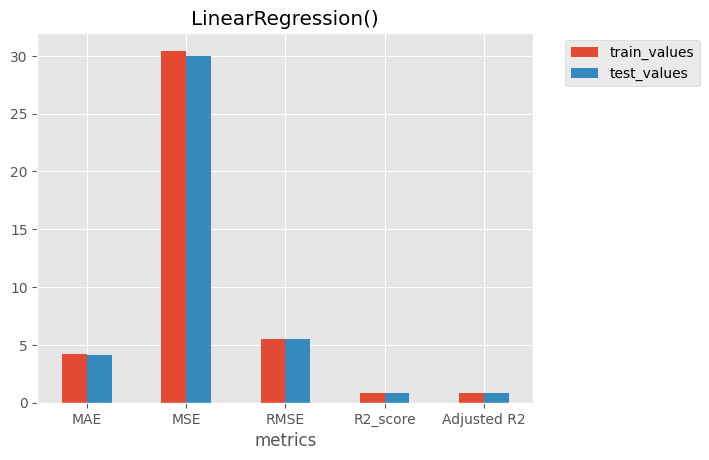

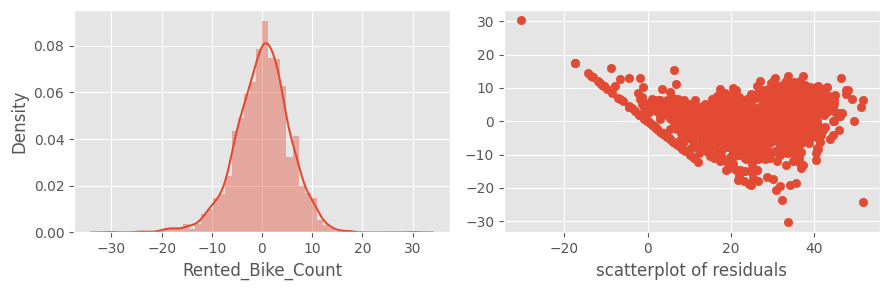

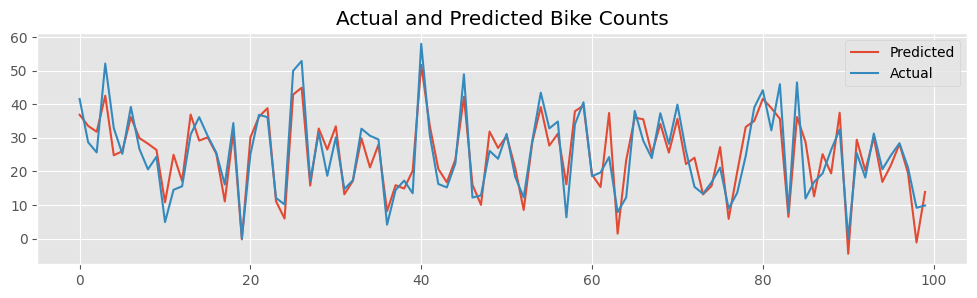

In [ ]:
#Getting the metric value
metric_value(Linear_Regression,x_train,y_train,x_test,y_test)

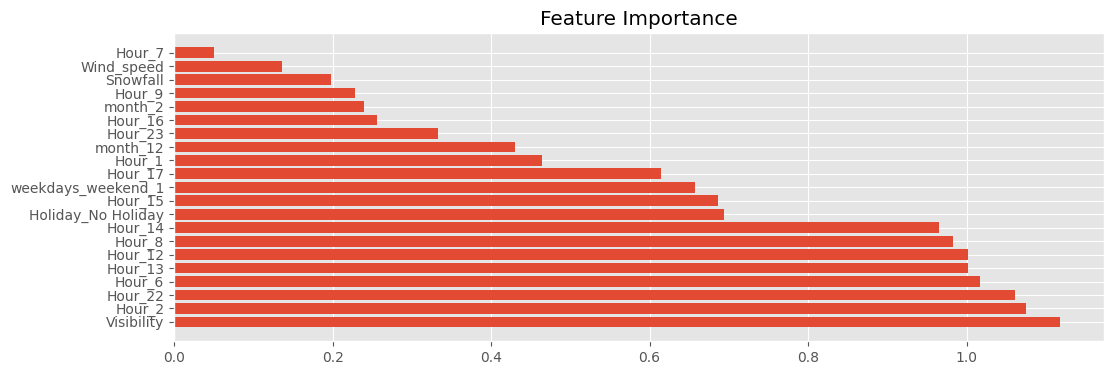

In [ ]:
#feature importance
feature_importance(Linear_Regression)

* **Simple Linear Regression Model**
* **R2 score of Train data : 0.804**
* **adjusted R2 score of Train data : 0.799**
* **R2 score of Test data : 0.805**
* **adjusted R2 score of Test data : 0.800**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** Visibility, weekdays_weekend_1,holiday_noholiday,hour:2,22,6,13,12,8,14,15,17

##**Ridge Regression**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(x_train,y_train)

Ridge(alpha=0.1)

       metrics  train_values  test_values
0          MAE         4.210        4.168
1          MSE        30.443       29.952
2         RMSE         5.517        5.473
3     R2_score         0.804        0.805
4  Adjusted R2         0.799        0.800


<Figure size 400x400 with 0 Axes>

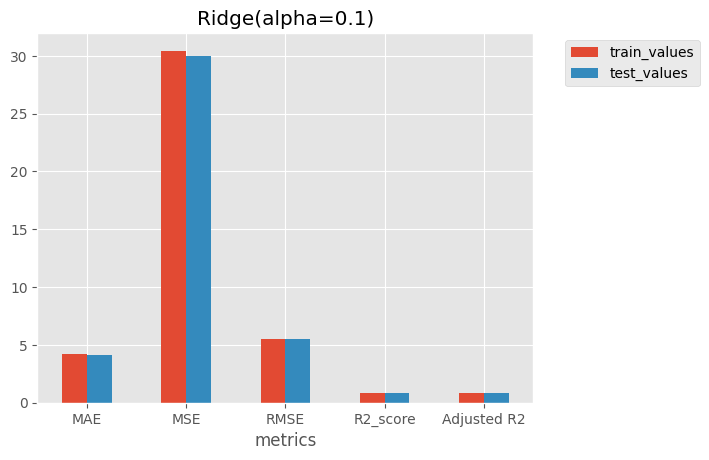

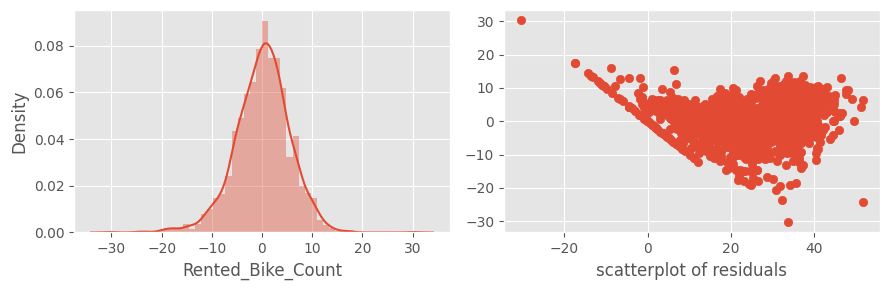

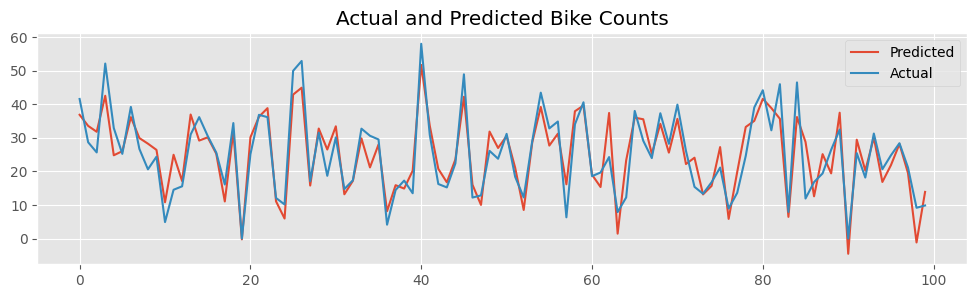

In [ ]:
#Getting the metric value
metric_value(ridge_regression,x_train,y_train,x_test,y_test)

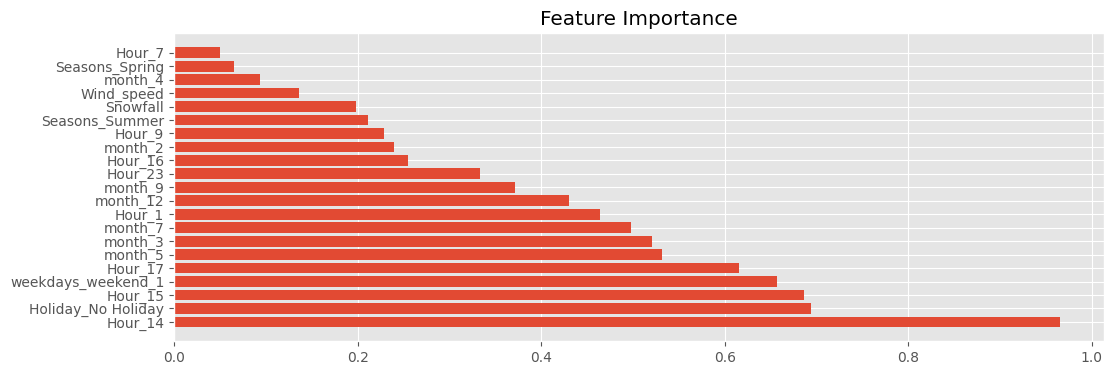

In [ ]:
#feature importance
feature_importance(ridge_regression)

* **Ridge Regression Model**
* **R2 score of Train data : 0.804**
* **adjusted R2 score of Train data : 0.799**
* **R2 score of Test data : 0.805**
* **adjusted R2 score of Test data : 0.800**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** weekdays_weekend_1,holiday_noholiday,hour:14,15,17,1,12 month:5,3,7,12

##**Decision Tree with gridsearchcv**

In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
dt_model = dtr.fit(x_train,y_train)

       metrics  train_values  test_values
0          MAE         1.945        2.927
1          MSE         9.261       22.502
2         RMSE         3.043        4.744
3     R2_score         0.940        0.854
4  Adjusted R2         0.939        0.850


<Figure size 400x400 with 0 Axes>

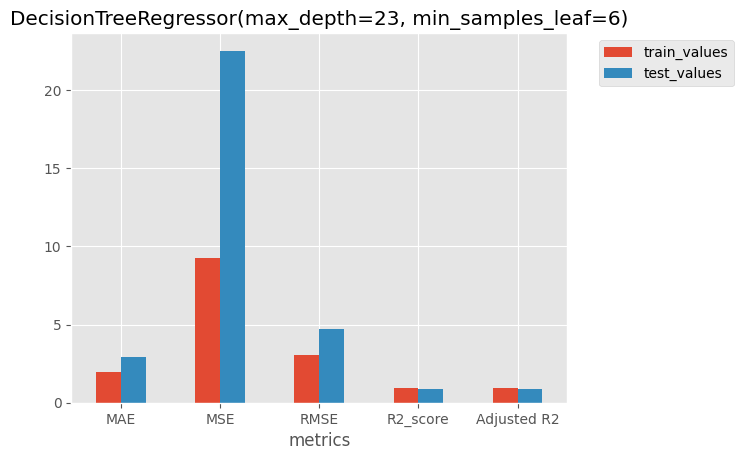

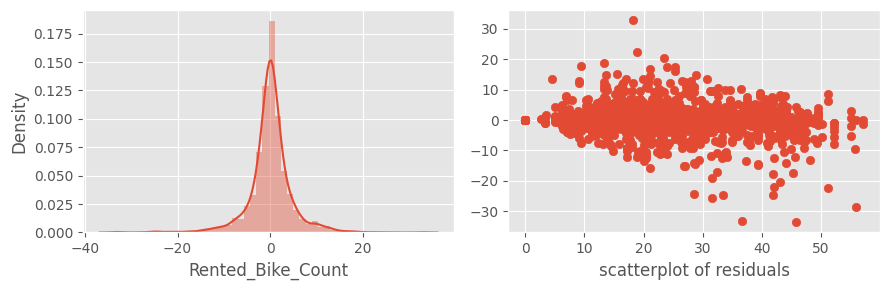

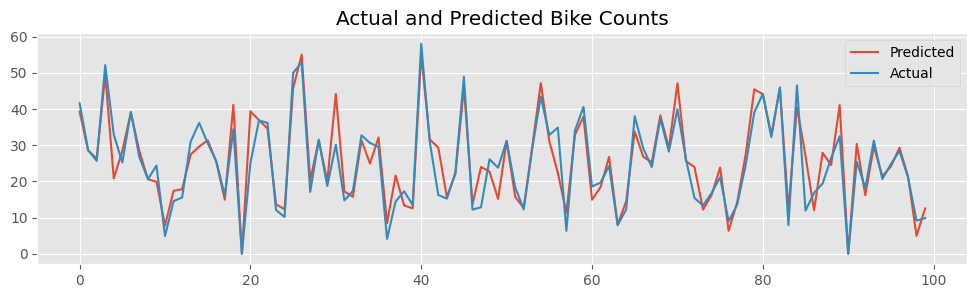

In [ ]:
#Getting the metric value
metric_value(dt_model,x_train,y_train,x_test,y_test)

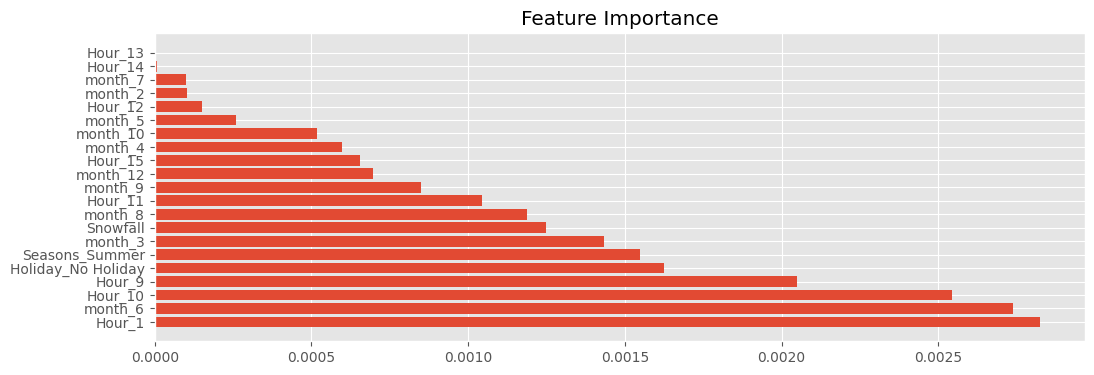

In [ ]:
#feature importance
feature_importance(dt_model)

* **Decision Tree Regression with GridSearchCV Model**
* **R2 score of Train data : 0.94**
* **adjusted R2 score of Train data : 0.93.9**
* **R2 score of Test data : 0.85.4**
* **adjusted R2 score of Test data : 0.85**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** hour:9,10,1, month:6 ,holiday_no holiday

##**Random Forest**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

       metrics  train_values  test_values
0          MAE         0.833        2.243
1          MSE         1.771       13.417
2         RMSE         1.331        3.663
3     R2_score         0.989        0.913
4  Adjusted R2         0.988        0.910


<Figure size 400x400 with 0 Axes>

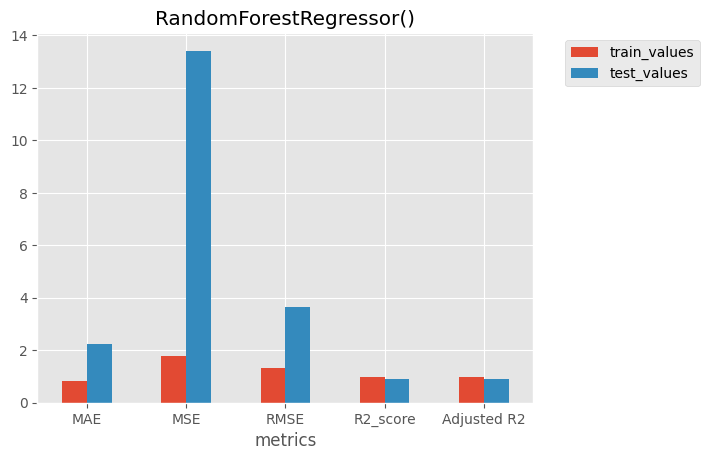

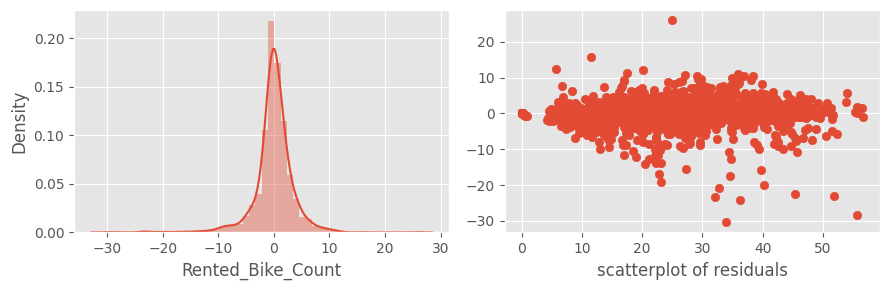

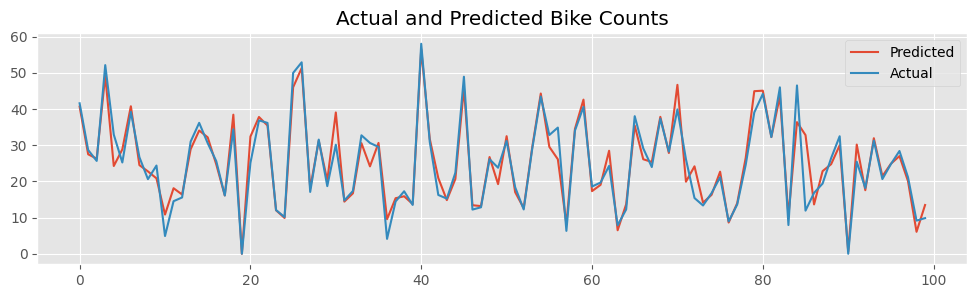

In [ ]:
#Getting the metric value
metric_value(rf_model,x_train,y_train,x_test,y_test)

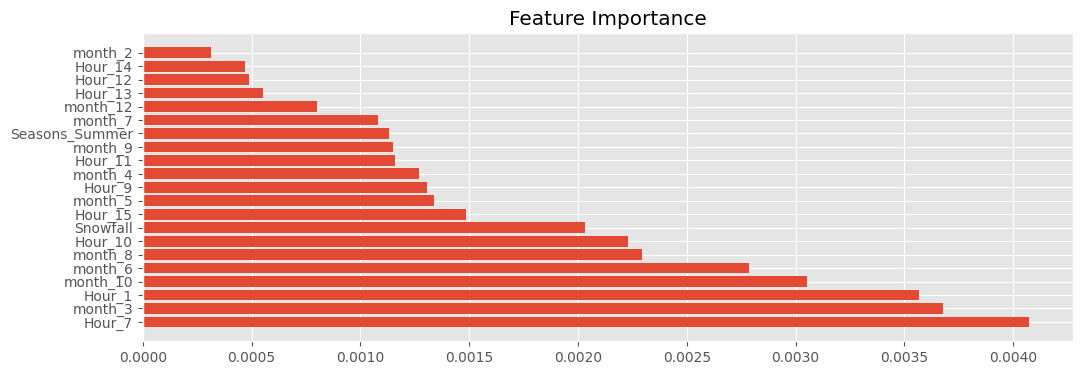

In [ ]:
#feature importance
feature_importance(rf_model)

* **Random Forest Model**
* **R2 score of Train data : 0.989**
* **adjusted R2 score of Train data : 0.988**
* **R2 score of Test data : 0.913**
* **adjusted R2 score of Test data : 0.91**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** hour:7,1,10, month:3,10,6,8 snowfall

##**Gradient Boosting**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

       metrics  train_values  test_values
0          MAE         3.455        3.623
1          MSE        21.336       23.772
2         RMSE         4.619        4.876
3     R2_score         0.863        0.846
4  Adjusted R2         0.859        0.841


<Figure size 400x400 with 0 Axes>

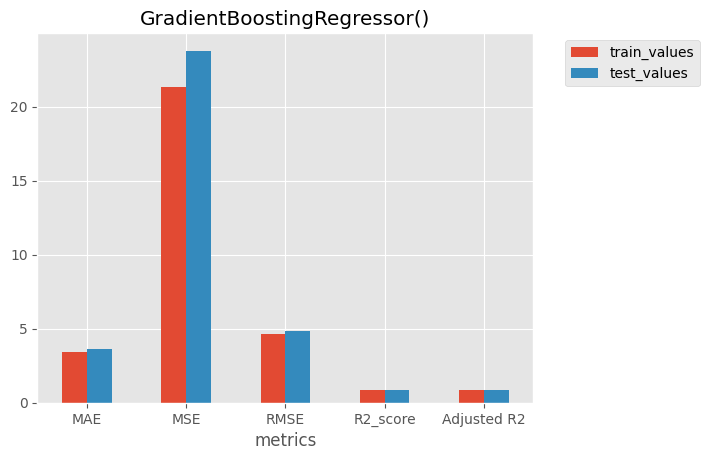

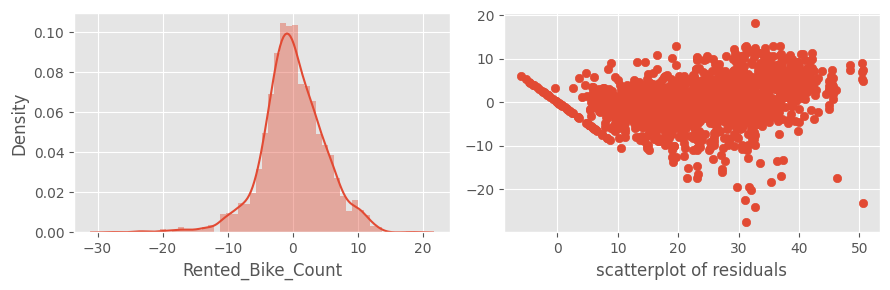

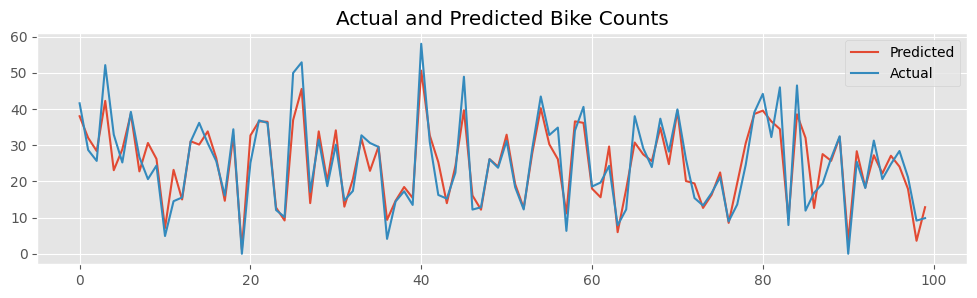

In [ ]:
#Getting the metric value
metric_value(gradient_boosting_regressor,x_train,y_train,x_test,y_test)

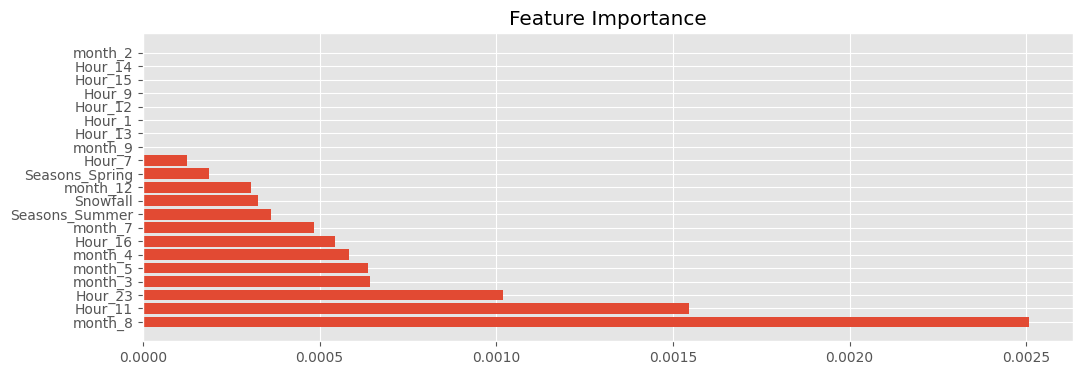

In [ ]:
#feature importance
feature_importance(gradient_boosting_regressor)

* **Gradient Boosting Model**
* **R2 score of Train data : 0.863**
* **adjusted R2 score of Train data : 0.859**
* **R2 score of Test data : 0.846**
* **adjusted R2 score of Test data : 0.841**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** hour:11,23 month:8,3,5

###**Gradient Boosting with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gradient_boosting_gridsearchcv = GridSearchCV(estimator=gb_model,param_grid = param_dict,cv = 5)
gradient_boosting_gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [50, 80, 100]})

In [ ]:
gb_optimal_model = gradient_boosting_gridsearchcv.best_estimator_

       metrics  train_values  test_values
0          MAE         1.745        2.337
1          MSE         7.109       13.143
2         RMSE         2.666        3.625
3     R2_score         0.954        0.915
4  Adjusted R2         0.953        0.912


<Figure size 400x400 with 0 Axes>

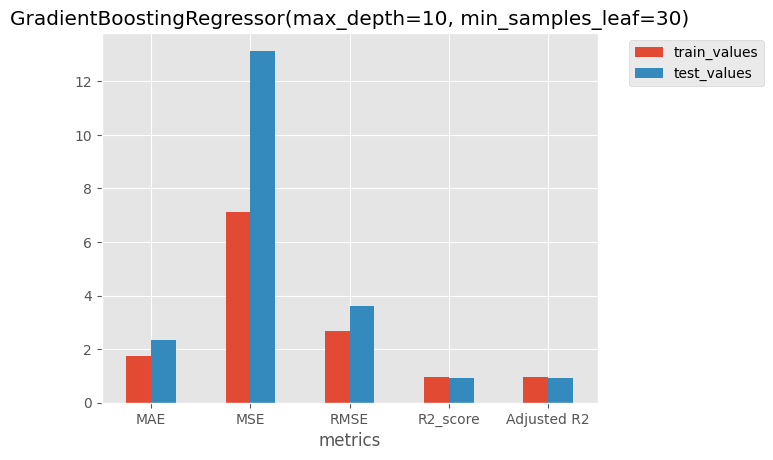

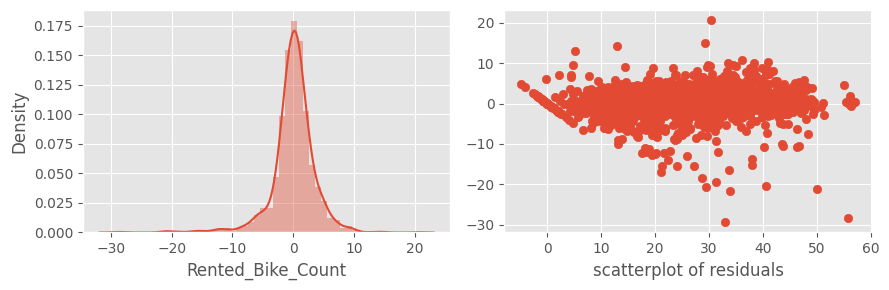

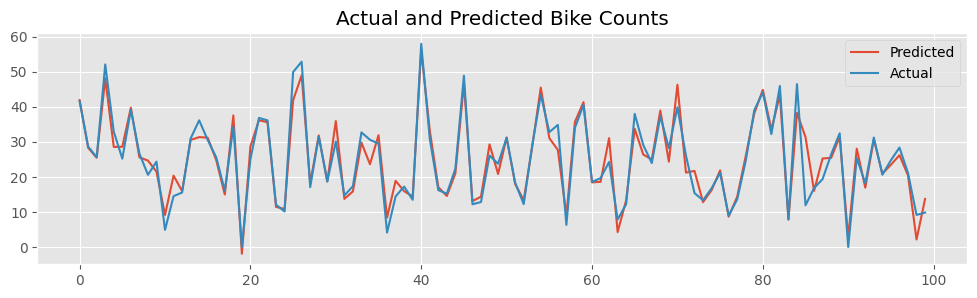

In [ ]:
#Getting the metric value
metric_value(gb_optimal_model,x_train,y_train,x_test,y_test)

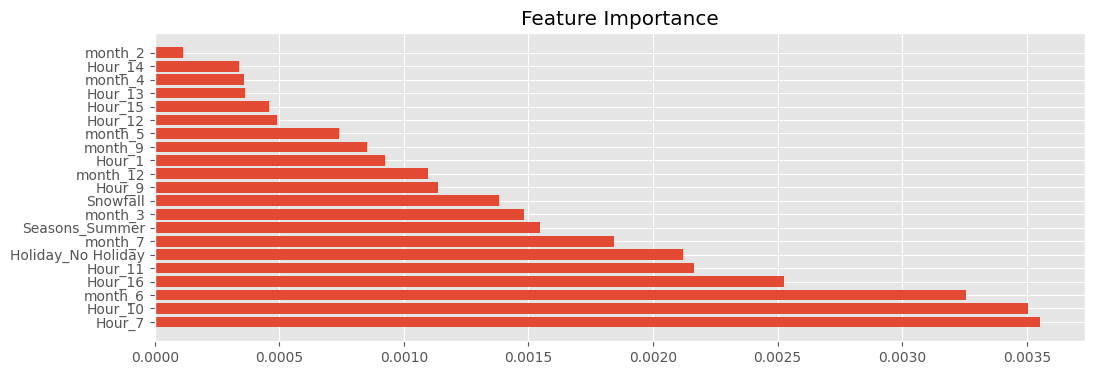

In [ ]:
#feature importance
feature_importance(gb_optimal_model)

* **Gradient Boosting with GridSearchCV Model**
* **R2 score of Train data : 0.954**
* **adjusted R2 score of Train data : 0.951**
* **R2 score of Test data : 0.915**
* **adjusted R2 score of Test data : 0.912**
* **Performance of data: Best**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** hour:7,10,16,11, month:6,7 , holiday_no holiday

##**XgBoost with RandomizedSearchCV**

In [ ]:
#Import Library
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
!pip install -U scikit-learn

In [ ]:
#hyperparameter optimization
params = {'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,15],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.7]
}

In [ ]:
xgb_regressor = xgboost.XGBRegressor()
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Getting best estimator
xgb_model = random_search.best_estimator_
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

       metrics  train_values  test_values
0          MAE         1.416        2.284
1          MSE         4.658       12.763
2         RMSE         2.158        3.573
3     R2_score         0.970        0.917
4  Adjusted R2         0.969        0.915


<Figure size 400x400 with 0 Axes>

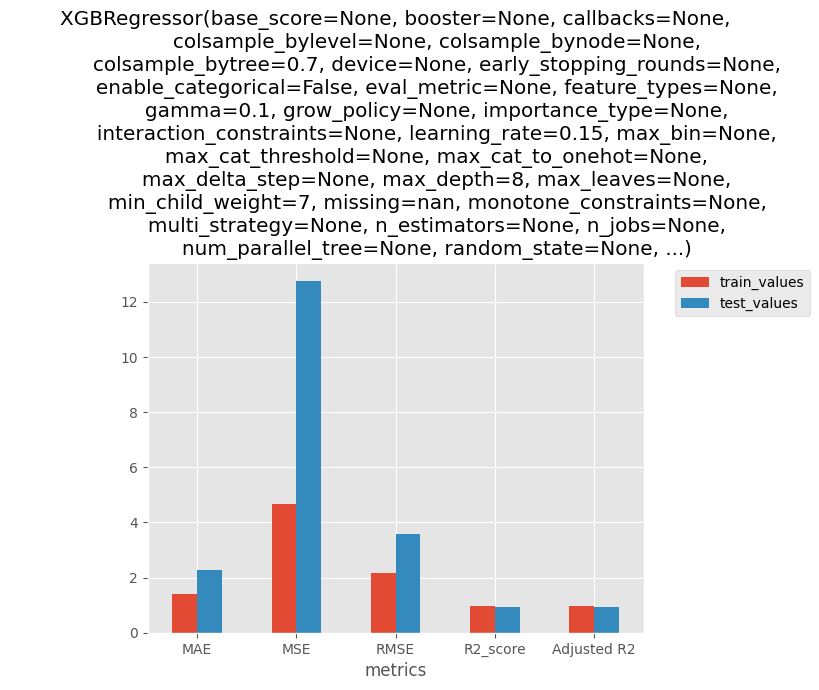

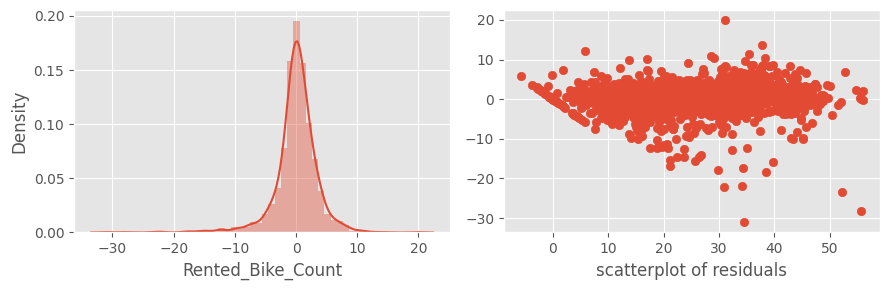

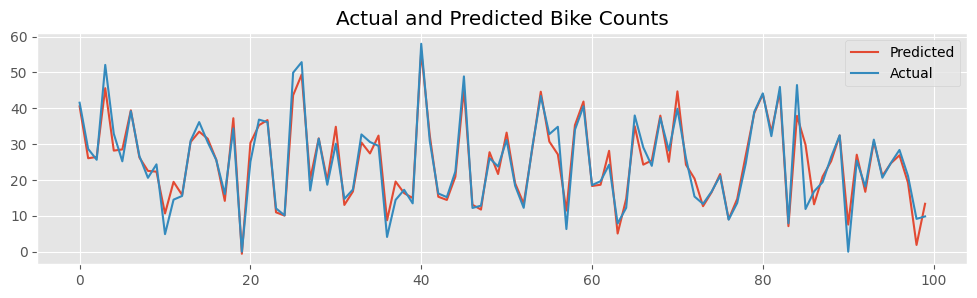

In [ ]:
#Getting the metric value
metric_value(xgb_model,x_train,y_train,x_test,y_test)

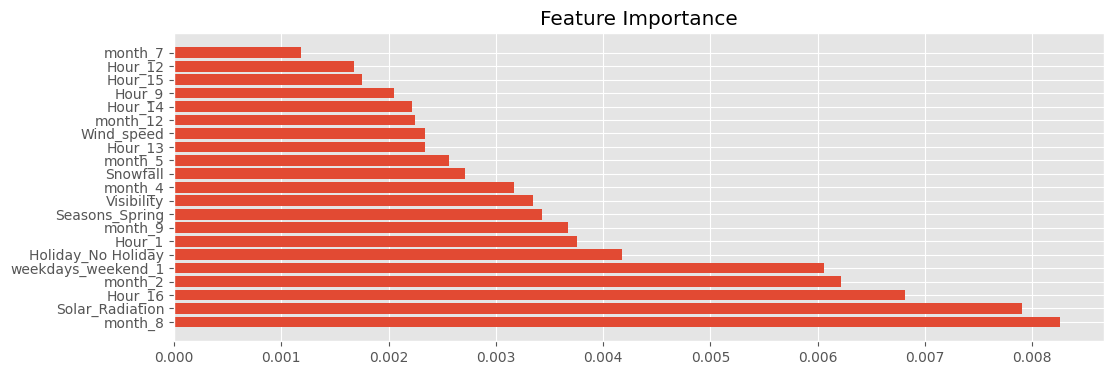

In [ ]:
#feature importance
feature_importance(xgb_model)

* **XgBoost with RandomisedSearchCV Model**
* **R2 score of Train data : 0.97**
* **adjusted R2 score of Train data : 0.969**
* **R2 score of Test data : 0.917**
* **adjusted R2 score of Test data : 0.915**
* **Performance of data: Best**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* **Important features:** hour:16,1 month:8,2,9 snowfall, holiday_no_holiday, solar_radiation, weekdays_weekend_1

#**Model Explainability by LIME**

In [ ]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [ ]:
# Putting features into respective float, cat , int list.
for i in x.columns:
    if x[i].dtype == 'float' :
        float_columns.append(i)
    elif x[i].dtype == 'int64':
        int_columns.append(i)
    elif x[i].dtype == 'object':
        cat_columns.append(i)

In [ ]:
train_cat_features = x[cat_columns]
train_float_features = x[float_columns]
train_int_features = x[int_columns]

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=458475419bcf36f219d6a4002a2aa5dba7787806700993ccb3dac9187ff0b27e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(feature_names = x.columns,
                                                  training_data = np.array(x_train),
                                                  mode='regression')

In [ ]:
# Get the explanation for RandomForest
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = rf_model.predict)
exp.show_in_notebook(show_table=True)

In [ ]:
# Get the explanation for Gradient Boosting with GridSearchCV
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = gradient_boosting_gridsearchcv.predict)
exp.show_in_notebook(show_table=True)